## Run SimSS simulations and plot the results
Version 0.1
(c) Vincent M. Le Corre (https://github.com/VMLC-PV)

In [12]:
# Package import
# %matplotlib inline
import os,platform,warnings,itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# Import homemade package by VLC
from SIMsalabim_utils.RunSim import PrepareSimuInputs, RunSimulation # Run simulation
from SIMsalabim_utils.SimSS_plots import PlotJV, PlotJVPerf,PlotNrjDiagSimSS,PlotDensSimSS # Plotting functions
from SIMsalabim_utils.CleanFolder import clean_up_output, clean_file_type # Cleaning functions
from SIMsalabim_utils import plot_settings_screen # Plot settings
from SIMsalabim_utils.aux_func import * # Plot settings


## General Inputs
warnings.filterwarnings("ignore")           # Don't show warnings
system = platform.system()                  # Operating system
max_jobs = os.cpu_count()-2                 # Max number of parallel simulations (for number of CPU use: os.cpu_count() )
do_multiprocessing = True                      # Use multiprocessing
if system == 'Windows':                     # cannot easily do multiprocessing in Windows
        max_jobs = 1
        do_multiprocessing = False
        try:                                # kill all running jobs to avoid conflicts
            os.system('taskkill.exe /F /IM simss.exe')
        except:
            pass

# Path to SIMsalabim
path2simu = os.path.join(os.getcwd() ,'SIMsalabim','SimSS')

In [3]:
# Prepare the command strings to run
#First, we need to create a list of the filenames containing the experimental data
path2data = os.path.join(os.getcwd(),'Example_Data','Perovskite_examples','Valencia')
ExpDataNames = [os.path.join(path2data,'01sun_fwd.dat'),os.path.join(path2data,'032sun_fwd.dat'),os.path.join(path2data,'05sun_fwd.dat'),os.path.join(path2data,'079sun_fwd.dat'),os.path.join(path2data,'082sun_fwd.dat')]

#Then, we need to create a list with the strings to run the simulations (results from your fits)
str_lst = ['-Gfrac 0.1','-Gfrac 0.32','-Gfrac 0.5','-Gfrac 0.79','-Gfrac 0.82']

# Prepare custom labels
labels = ['Gfrac = 0.1','Gfrac = 0.32','Gfrac = 0.5','Gfrac = 0.79','Gfrac = 0.82']

Gfrac = [0.1,0.32,0.5,0.79,0.82]
# Prepare necessary lists for the RunSimulation function
JV_files,Var_files,scPars_files,code_name_lst,path_lst = [],[],[],[],[]
for i in range(len(str_lst)):
    JV = 'JV_' + str(i) + '.dat'
    Var = 'Var_' + str(i) + '.dat'
    scPar = 'scPar_' + str(i) + '.dat'
    str_lst[i] = str_lst[i] + ' -JV_file ' + JV + ' -Var_file ' + Var + ' -scPars_file ' + scPar
    JV_files.append(os.path.join(path2simu,JV))
    Var_files.append(os.path.join(path2simu,Var))
    scPars_files.append(os.path.join(path2simu,scPar))
    code_name_lst.append('SimSS')
    path_lst.append(path2simu)


Simulation_Inputs = str_lst,JV_files,Var_files,scPars_files,code_name_lst,path_lst,labels

# Run the simulations
run_simu = True
if run_simu:
    RunSimulation(Simulation_Inputs,max_jobs=max_jobs,do_multiprocessing=do_multiprocessing,verbose=True) # runs the simulations


Welcome to SimSS version 4.45.
Copyright (C) 2020, 2021, 2022, 2023 Dr T.S. Sherkar, Dr V.M. Le Corre,
Dr M. Koopmans, F. Wobben, and Prof L.J.A. Koster, University of Groningen.

Read parameters from device_parameters.txt
At Vint=0.000 converged in  21 loop(s), Jint=-11.9385 convIndex: 1
At Vint=0.020 converged in  14 loop(s), Jint=-11.9314 convIndex: 1
At Vint=0.040 converged in   9 loop(s), Jint=-11.9240 convIndex: 1
At Vint=0.060 converged in   9 loop(s), Jint=-11.9164 convIndex: 1
At Vint=0.080 converged in   9 loop(s), Jint=-11.9085 convIndex: 1
At Vint=0.100 converged in   9 loop(s), Jint=-11.9003 convIndex: 1
At Vint=0.120 converged in   9 loop(s), Jint=-11.8919 convIndex: 1
At Vint=0.140 converged in   9 loop(s), Jint=-11.8832 convIndex: 1
At Vint=0.160 converged in   9 loop(s), Jint=-11.8741 convIndex: 1
At Vint=0.180 converged in   9 loop(s), Jint=-11.8647 convIndex: 1
At Vint=0.200 converged in   9 loop(s), Jint=-11.8550 convIndex: 1
At Vint=0.220 converged in   9 loop(s), 

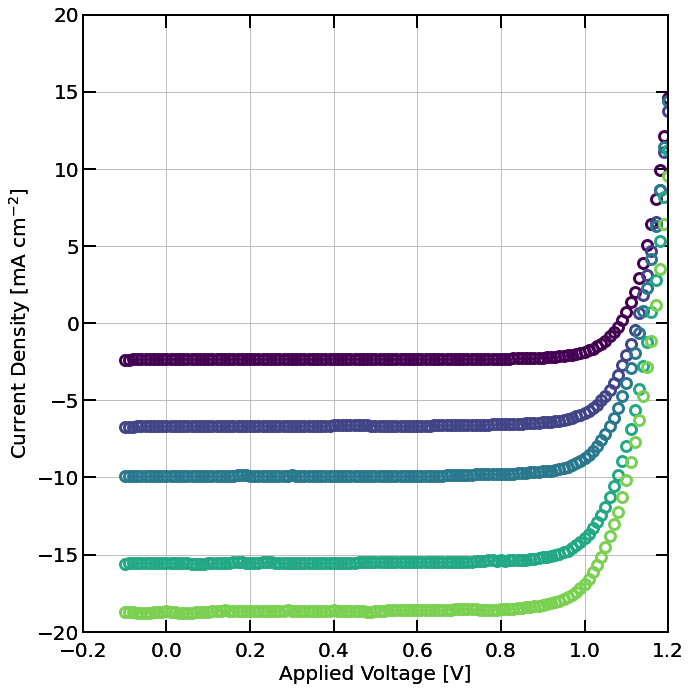

In [7]:
# Make JV plots
# Plot the JV curves
colors = plt.cm.viridis(np.linspace(0,1,max(len(str_lst),3)+1)) # prepare color for plots

# plot lin-log JV
f = plt.figure(1,figsize=(10,10))
PlotJV(JV_files, labels=labels,colors = colors,num_fig=1,plot_type=0,x='Vext',y=['Jext'],legend=True,xlimits=[-0.2,1.2],ylimits=[-20,20],x_unit='V',y_unit='mA/cm^2',save_fig=True,fig_name=os.path.join(path2simu,'JV.png'),mark='',line_type = ['-'])
PlotJV(ExpDataNames,labels=labels,colors = colors,num_fig=1,plot_type=0,x='V',y=['J'],legend=False,xlimits=[-0.2,1.2],ylimits=[-20,20],x_unit='V',y_unit='mA/cm^2',save_fig=True,fig_name=os.path.join(path2simu,'JV.png'),mark='o',line_type = ['None'])


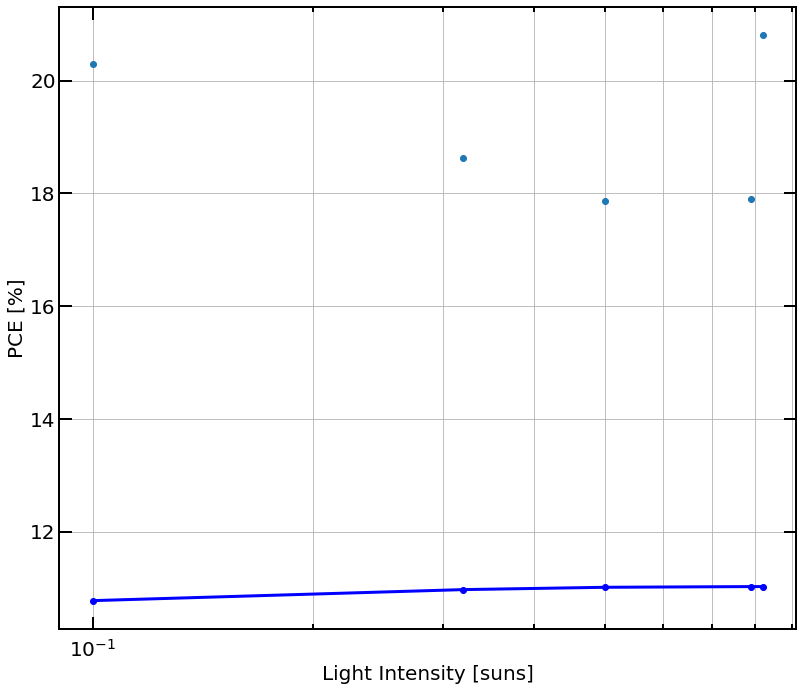

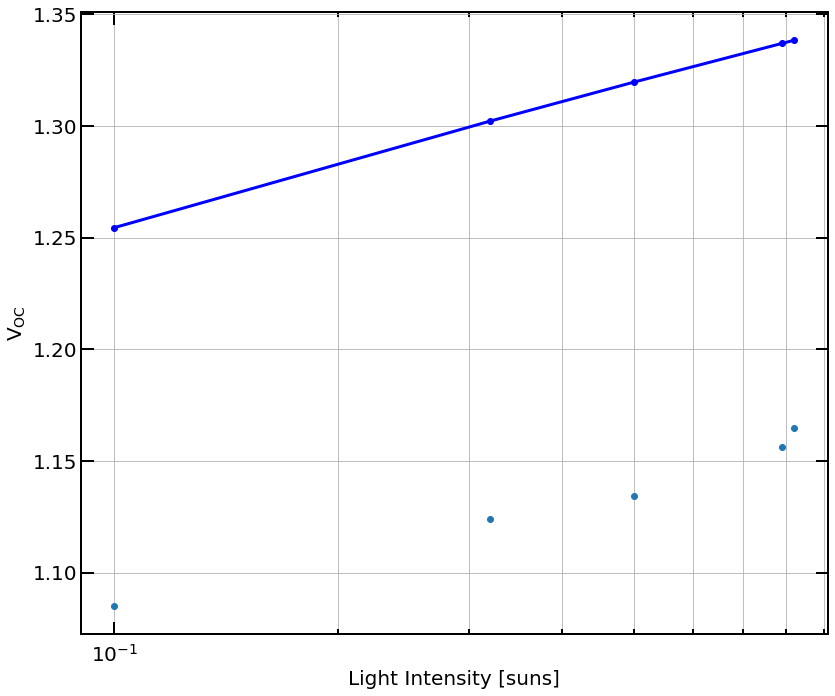

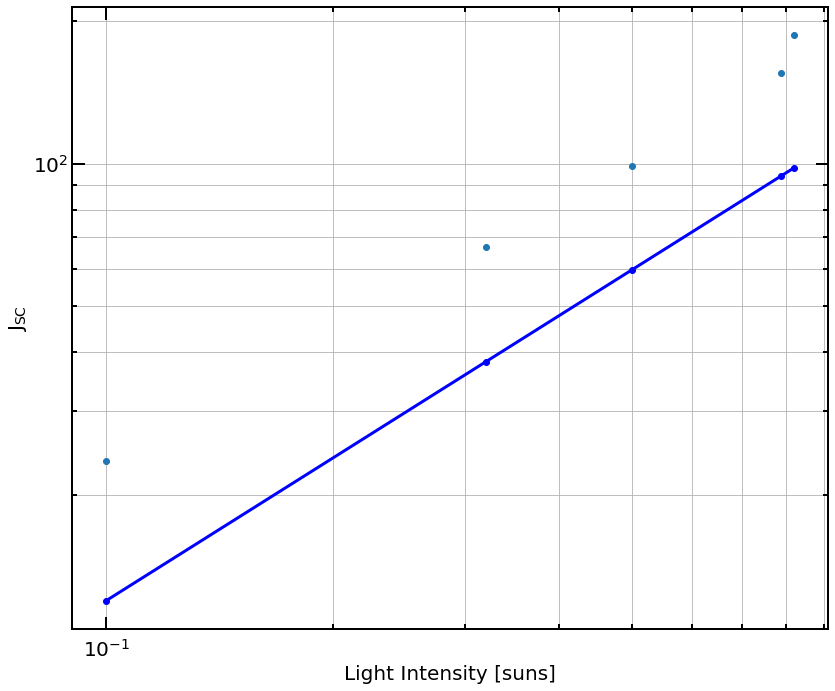

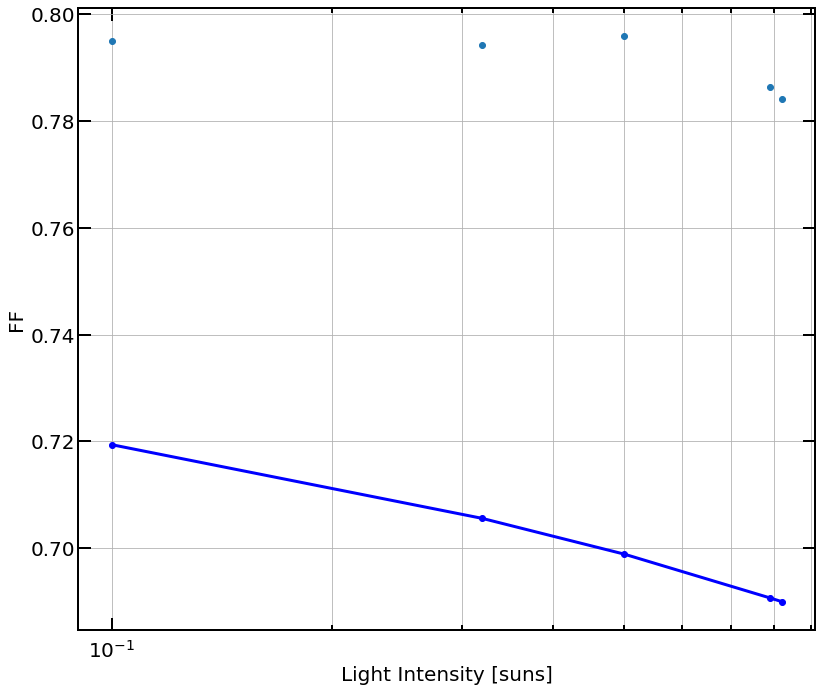

In [13]:
# Plot performance
Gfracs = [0.1,0.32,0.5,0.79,0.82]
plot_perf = True
if plot_perf:
    PlotJVPerf(Gfracs, scPars_files,y='PCE',Gfrac=Gfrac,plot_type=1,xlimits=[],ylimits=[],xlabel='Light Intensity [suns]',ylabel='PCE [%]',legend='',num_fig=5,mark='o',line_type = ['-'],norm_plot=False,fig_name=os.path.join(path2simu,'JV_perf.png'))

    PCE_exp,Voc_exp,Jsc_exp,FF_exp = [],[],[],[]
    for i,G in zip(ExpDataNames,Gfracs):
        JV = pd.read_csv(i,delim_whitespace=True)
        PCE_exp.append(get_PCE(JV['V'],JV['J'],G)/10)
        Voc_exp.append(get_Voc(JV['V'],JV['J']))
        Jsc_exp.append(-get_Jsc(JV['V'],JV['J']))
        FF_exp.append(get_FF(JV['V'],JV['J']))

    plt.plot(Gfracs,PCE_exp,'o')

    PlotJVPerf(Gfracs, scPars_files,y='Voc',Gfrac=Gfracs,plot_type=1,xlimits=[],ylimits=[],xlabel='Light Intensity [suns]',ylabel='V$_{OC}$',legend='',num_fig=6,mark='o',line_type = ['-'],norm_plot=False,fig_name=os.path.join(path2simu,'JV_perf.png'))
    plt.plot(Gfracs,Voc_exp,'o')

    PlotJVPerf(Gfracs, scPars_files,y='Jsc',Gfrac=Gfracs,plot_type=3,xlimits=[],ylimits=[],xlabel='Light Intensity [suns]',ylabel='J$_{SC}$',legend='',num_fig=7,mark='o',line_type = ['-'],norm_plot=False,fig_name=os.path.join(path2simu,'JV_perf.png'))
    plt.plot(Gfracs,Jsc_exp,'o')

    PlotJVPerf(Gfracs, scPars_files,y='FF',Gfrac=Gfracs,plot_type=1,xlimits=[],ylimits=[],xlabel='Light Intensity [suns]',ylabel='FF',legend='',num_fig=8,mark='o',line_type = ['-'],norm_plot=False,fig_name=os.path.join(path2simu,'JV_perf.png'))
    plt.plot(Gfracs,FF_exp,'o')



In [6]:
# Clean output files from simulation folders
Do_Cleaning = False # Careful, this will delete all files in the folder
if Do_Cleaning:
    clean_up_output('tj',path2simu)
    clean_up_output('tVG',path2simu)
    clean_up_output('JV',path2simu)
    clean_up_output('Var',path2simu)
    clean_up_output('scPars',path2simu)

ModuleNotFoundError: No module named 'VLC_units'